In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv("hotel_booking.csv")

In [9]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [10]:
print(df.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  customer_type  \
0                        0                     0       2  ...      Transient   
1   

In [5]:
print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df=df.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','agent'],axis=1)

In [16]:
df.to_csv('cleaned_hotel_bookings.csv', index=False)

In [17]:
column_select=df[['adults','children','babies']]

In [18]:
column_select

,adults,children,babies
0,2,0.0,0
1,2,0.0,0
2,1,0.0,0
3,1,0.0,0
4,2,0.0,0
...,...,...,...
119385,2,0.0,0
119386,3,0.0,0
119387,2,0.0,0
119388,2,0.0,0


In [19]:
df['guest_type']=np.where((df['adults']==2) & (df['children']==0) & (df['babies']==0),'couples',
                np.where((df['adults']==1) & (df['children']==0) & (df['babies']==0),'single','family'))

In [20]:
df

,hotel,is_canceled,lead_time,arrival_date_month,adults,children,babies,meal,country,market_segment,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,guest_type
0,Resort Hotel,0,342,July,2,0.0,0,BB,PRT,Direct,...,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,couples
1,Resort Hotel,0,737,July,2,0.0,0,BB,PRT,Direct,...,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,couples
2,Resort Hotel,0,7,July,1,0.0,0,BB,GBR,Direct,...,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,single
3,Resort Hotel,0,13,July,1,0.0,0,BB,GBR,Corporate,...,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,single
4,Resort Hotel,0,14,July,2,0.0,0,BB,GBR,Online TA,...,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,couples
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,August,2,0.0,0,BB,BEL,Offline TA/TO,...,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647,couples
119386,City Hotel,0,102,August,3,0.0,0,BB,FRA,Online TA,...,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333,family
119387,City Hotel,0,34,August,2,0.0,0,BB,DEU,Online TA,...,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821,couples
119388,City Hotel,0,109,August,2,0.0,0,BB,GBR,Online TA,...,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860,couples


In [21]:
df['room_status']=np.where((df['reserved_room_type'])==(df['assigned_room_type']) ,'desire','undesire')
            

In [22]:
df

,hotel,is_canceled,lead_time,arrival_date_month,adults,children,babies,meal,country,market_segment,...,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,guest_type,room_status
0,Resort Hotel,0,342,July,2,0.0,0,BB,PRT,Direct,...,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,couples,desire
1,Resort Hotel,0,737,July,2,0.0,0,BB,PRT,Direct,...,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,couples,desire
2,Resort Hotel,0,7,July,1,0.0,0,BB,GBR,Direct,...,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,single,undesire
3,Resort Hotel,0,13,July,1,0.0,0,BB,GBR,Corporate,...,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,single,desire
4,Resort Hotel,0,14,July,2,0.0,0,BB,GBR,Online TA,...,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,couples,desire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,August,2,0.0,0,BB,BEL,Offline TA/TO,...,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647,couples,desire
119386,City Hotel,0,102,August,3,0.0,0,BB,FRA,Online TA,...,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333,family,desire
119387,City Hotel,0,34,August,2,0.0,0,BB,DEU,Online TA,...,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821,couples,desire
119388,City Hotel,0,109,August,2,0.0,0,BB,GBR,Online TA,...,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860,couples,desire


In [23]:
column_select=df[['guest_type','is_canceled']]

In [30]:
column_select=np.where((df['is_canceled']==1).)

In [31]:
column_select

(array([     8,      9,     10, ..., 111924, 111925, 117295], dtype=int64),)

In [32]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_month,adults,children,babies,meal,country,market_segment,...,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,guest_type,room_status
0,Resort Hotel,0,342,July,2,0.0,0,BB,PRT,Direct,...,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,couples,desire
1,Resort Hotel,0,737,July,2,0.0,0,BB,PRT,Direct,...,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,couples,desire
2,Resort Hotel,0,7,July,1,0.0,0,BB,GBR,Direct,...,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,single,undesire
3,Resort Hotel,0,13,July,1,0.0,0,BB,GBR,Corporate,...,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,single,desire
4,Resort Hotel,0,14,July,2,0.0,0,BB,GBR,Online TA,...,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,couples,desire
5,Resort Hotel,0,14,July,2,0.0,0,BB,GBR,Online TA,...,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263,couples,desire
6,Resort Hotel,0,0,July,2,0.0,0,BB,PRT,Direct,...,0,0,Check-Out,2015-07-03,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994,couples,desire
7,Resort Hotel,0,9,July,2,0.0,0,FB,PRT,Direct,...,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729,couples,desire
8,Resort Hotel,1,85,July,2,0.0,0,BB,PRT,Online TA,...,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639,couples,desire
9,Resort Hotel,1,75,July,2,0.0,0,HB,PRT,Offline TA/TO,...,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190,couples,desire


In [47]:
df['guest_type'].unique()
diff_type=df['guest_type'].value_counts()
diff_type

guest_type
couples    81557
single     22577
family     15256
Name: count, dtype: int64

In [57]:
guest_type_counts = df['guest_type'].value_counts()
pivot_guest=df.pivot_table(index='guest_type',values='is_canceled',aggfunc=sum)
combined_df = pivot_guest.merge(guest_type_counts.rename('total_count'), left_index=True, right_index=True)

combined_df=combined_df[['total_count','is_canceled']]
print(combined_df)

            total_count  is_canceled
guest_type                          
couples           81557        32421
family            15256         5248
single            22577         6555


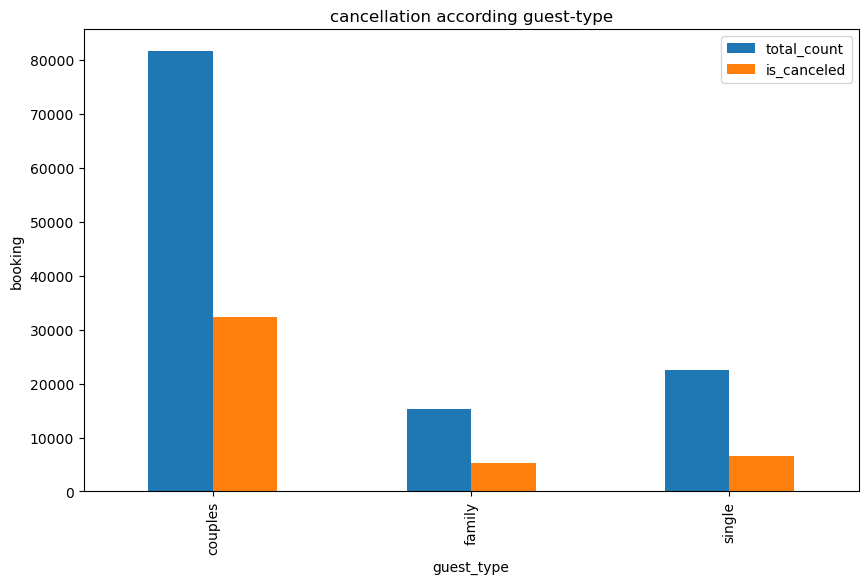

In [58]:
import matplotlib.pyplot as plt
combined_df.plot(kind='bar',figsize=(10,6))

plt.title('cancellation according guest-type')
plt.xlabel('guest_type')
plt.ylabel('booking')

plt.show()

In [60]:
room_type_count = df['room_status'].value_counts()
pivot_guest=df.pivot_table(index='room_status',values='is_canceled',aggfunc=sum)
combined_df = pivot_guest.merge(room_type_count.rename('total_count'), left_index=True, right_index=True)

combined_df=combined_df[['total_count','is_canceled']]
print(combined_df)

             total_count  is_canceled
room_status                          
desire            104473        43422
undesire           14917          802


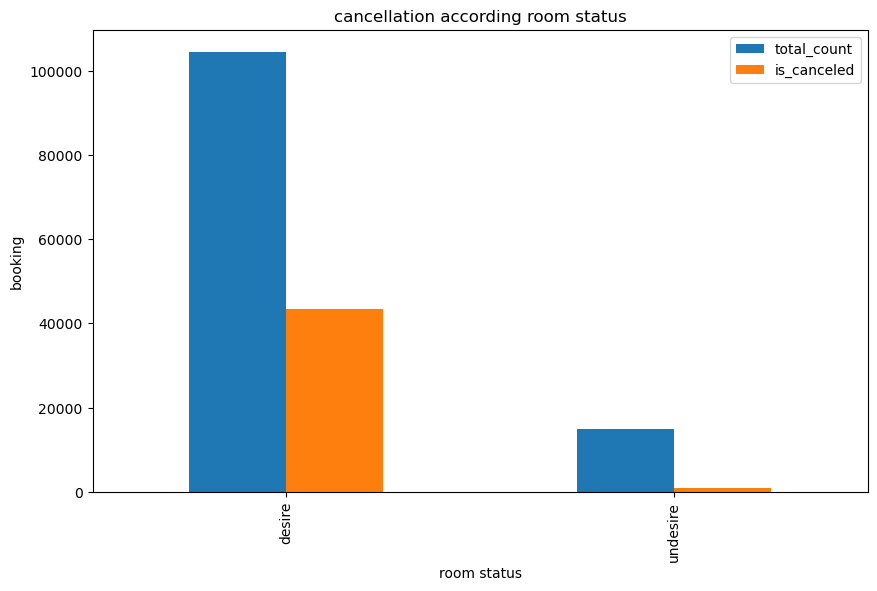

In [61]:
import matplotlib.pyplot as plt
combined_df.plot(kind='bar',figsize=(10,6))

plt.title('cancellation according room status')
plt.xlabel('room status')
plt.ylabel('booking')

plt.show()

In [74]:
month_count=df['arrival_date_month'].value_counts()
pivot_month=df.pivot_table(index='arrival_date_month',values='is_canceled',aggfunc=sum)
combined_df=pivot_month.merge(month_count.rename('total_count'),left_index=True,right_index=True)
combined_df=combined_df[['total_count','is_canceled']]
#print(combined_df)
#combined_df = combined_df.sort_values('arrival_date_month')
print(combined_df)

                    total_count  is_canceled
arrival_date_month                          
April                     11089         4524
August                    13877         5239
December                   6780         2371
February                   8068         2696
January                    5929         1807
July                      12661         4742
June                      10939         4535
March                      9794         3149
May                       11791         4677
November                   6794         2122
October                   11160         4246
September                 10508         4116


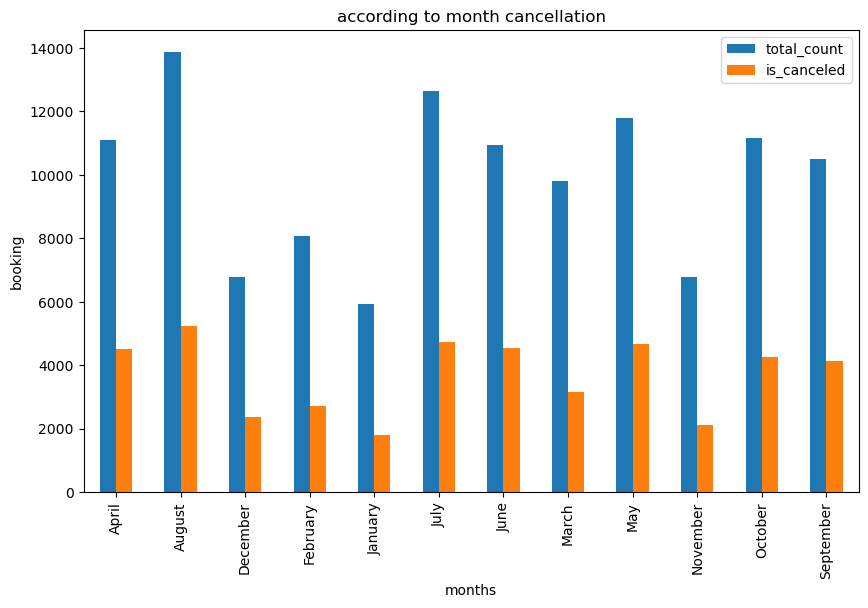

In [78]:
import matplotlib.pyplot as plt
combined_df.plot(kind='bar',figsize=(10,6))
plt.title('according to month cancellation')
plt.xlabel('months')
plt.ylabel('booking')

plt.show()

In [79]:
hotel_type_count = df['hotel'].value_counts()
pivot_guest=df.pivot_table(index='hotel',values='is_canceled',aggfunc=sum)
combined_df = pivot_guest.merge(hotel_type_count.rename('total_count'), left_index=True, right_index=True)

combined_df=combined_df[['total_count','is_canceled']]
print(combined_df)

              total_count  is_canceled
hotel                                 
City Hotel          79330        33102
Resort Hotel        40060        11122


In [110]:
type=df['hotel'].unique()
diff_type=df['hotel'].value_counts()
diff_type

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

In [136]:
import pandas as pd
gp=df.groupby('hotel').agg({"is_canceled":"count"})
gp

,is_canceled
hotel,
City Hotel,79330
Resort Hotel,40060


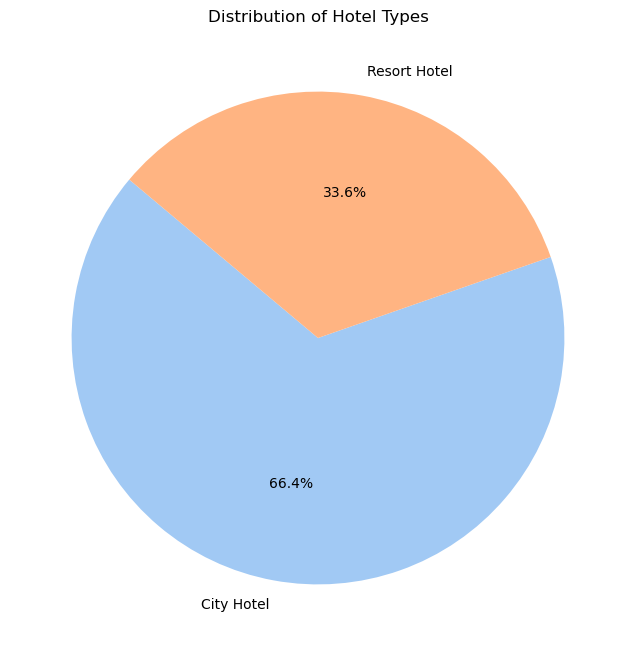

In [11]:


diff_type = df['hotel'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(diff_type, labels=diff_type.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))


plt.title('Distribution of Hotel Types')


plt.show()
